1. INTRODUCTION

In [21]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as  plt
import seaborn as sns

df = pd.read_csv("top_insta_influencers_data.csv")

df.head()

,rank,channel_info,influence_score,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes,country
0,1,cristiano,92,3.3k,475.8m,8.7m,1.39%,6.5m,29.0b,Spain
1,2,kyliejenner,91,6.9k,366.2m,8.3m,1.62%,5.9m,57.4b,United States
2,3,leomessi,90,0.89k,357.3m,6.8m,1.24%,4.4m,6.0b,NaN
3,4,selenagomez,93,1.8k,342.7m,6.2m,0.97%,3.3m,11.5b,United States
4,5,therock,91,6.8k,334.1m,1.9m,0.20%,665.3k,12.5b,United States


2. DATA CLEANING:

In [22]:
# Clean column names (remove extra spaces and lowercase)
df.columns = df.columns.str.strip().str.lower()

# Fill missing countries with 'Unknown'
df['country'] = df['country'].fillna('Unknown')

# Remove 'm' and 'k' from numeric columns and convert to float
def convert_to_number(x):
    if isinstance(x, str):
        if 'm' in x:
            return float(x.replace('m', '')) * 1_000_000
        elif 'k' in x:
            return float(x.replace('k', '')) * 1_000
        elif 'b' in x:
            return float(x.replace('b', '')) * 1_000_000_000
    return pd.to_numeric(x, errors='coerce')

cols_to_clean = ['posts', 'followers', 'avg_likes', 'new_post_avg_like', 'total_likes']
for col in cols_to_clean:
    df[col] = df[col].apply(convert_to_number)

# Remove '%' from engagement rate and convert to float
df['60_day_eng_rate'] = df['60_day_eng_rate'].str.replace('%', '').astype(float)

print("\nCleaned Data Sample:")
display(df.head())


Cleaned Data Sample:


,rank,channel_info,influence_score,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes,country
0,1,cristiano,92,3300.0,475800000.0,8700000.0,1.39,6500000.0,2.900000e+10,Spain
1,2,kyliejenner,91,6900.0,366200000.0,8300000.0,1.62,5900000.0,5.740000e+10,United States
2,3,leomessi,90,890.0,357300000.0,6800000.0,1.24,4400000.0,6.000000e+09,Unknown
3,4,selenagomez,93,1800.0,342700000.0,6200000.0,0.97,3300000.0,1.150000e+10,United States
4,5,therock,91,6800.0,334100000.0,1900000.0,0.20,665300.0,1.250000e+10,United States


3. EXPLORATORY DATA ANALYSIS:

1. Top Influencer Overall (by influence score)

In [23]:
top_influencer = df.loc[df['influence_score'].idxmax()]
print("🏆 Top Influencer Overall:")
print(top_influencer[['channel_info', 'influence_score', 'followers', 'country']])

🏆 Top Influencer Overall:
channel_info         selenagomez
influence_score               93
followers            342700000.0
country            United States
Name: 3, dtype: object


2. Country with Most Top Influencers


🌍 Top Countries by Number of Influencers:
country
United States             66
Unknown                   62
Brazil                    13
India                     12
Indonesia                  7
France                     6
Spain                      5
United Kingdom             4
Canada                     3
Colombia                   3
Netherlands                2
Turkey                     2
Mexico                     2
Uruguay                    1
Italy                      1
United Arab Emirates       1
Puerto Rico                1
Australia                  1
CÃ´te d'Ivoire             1
Anguilla                   1
Sweden                     1
Switzerland                1
British Virgin Islands     1
Czech Republic             1
Germany                    1
Russia                     1
Name: count, dtype: int64


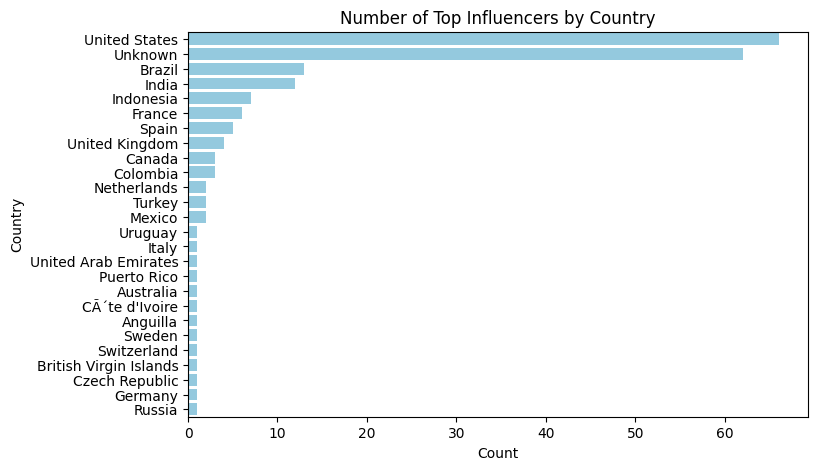

In [24]:
country_counts = df['country'].value_counts()
print("\n🌍 Top Countries by Number of Influencers:")
print(country_counts)

plt.figure(figsize=(8,5))
sns.countplot(y='country', data=df, order=df['country'].value_counts().index, color='skyblue')
plt.title('Number of Top Influencers by Country')
plt.xlabel('Count')
plt.ylabel('Country')
plt.show()

3. Engagement Rate vs Followers (Bar Chart)

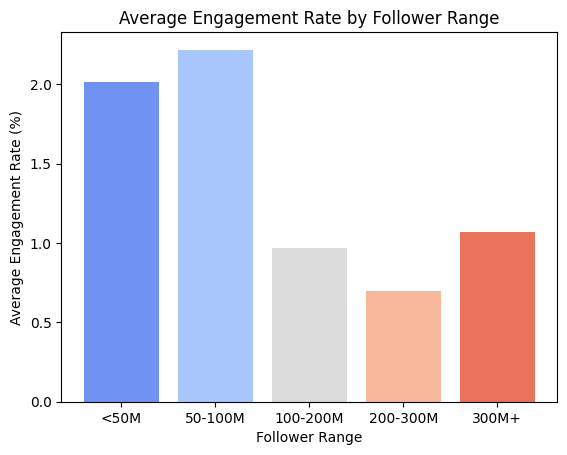

In [25]:
import numpy as np

# Create follower range bins
bins = [0, 50_000_000, 100_000_000, 200_000_000, 300_000_000, 500_000_000]
labels = ['<50M', '50-100M', '100-200M', '200-300M', '300M+']
df['follower_range'] = pd.cut(df['followers'], bins=bins, labels=labels)

# Average engagement rate per follower range
eng_rate_group = df.groupby('follower_range', observed=True)['60_day_eng_rate'].mean().reset_index()

colors = sns.color_palette('coolwarm', n_colors=len(eng_rate_group))
plt.bar(eng_rate_group['follower_range'], eng_rate_group['60_day_eng_rate'], color=colors)
plt.title('Average Engagement Rate by Follower Range')
plt.xlabel('Follower Range')
plt.ylabel('Average Engagement Rate (%)')
plt.show()


4. Average Influence Score by Country (Bar Chart)

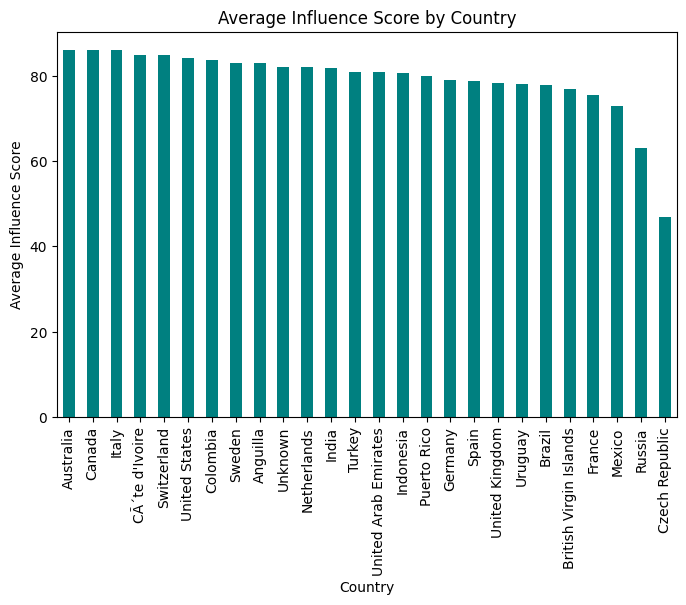

In [26]:
country_influence = df.groupby('country')['influence_score'].mean().sort_values(ascending=False)

plt.figure(figsize=(8,5))
country_influence.plot(kind='bar', color='teal')
plt.title('Average Influence Score by Country')
plt.xlabel('Country')
plt.ylabel('Average Influence Score')
plt.show()

5. Most Engaging Influencer

In [27]:
most_engaging = df.loc[df['60_day_eng_rate'].idxmax()]
print("\n🔥 Most Engaging Influencer:")
print(most_engaging[['channel_info', '60_day_eng_rate', 'followers', 'country']])


🔥 Most Engaging Influencer:
channel_info              j.m
60_day_eng_rate         26.41
followers          41900000.0
country               Unknown
Name: 140, dtype: object


6. Compare Average Likes vs New Post Likes (Pie Chart)

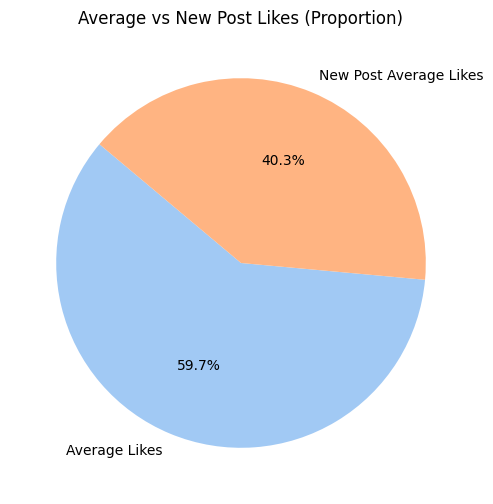

In [28]:
likes_data = [df['avg_likes'].mean(), df['new_post_avg_like'].mean()]
labels = ['Average Likes', 'New Post Average Likes']

plt.figure(figsize=(6,6))
plt.pie(likes_data, labels=labels, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Average vs New Post Likes (Proportion)')
plt.show()

7. Country-wise Average Engagement Rate


📈 Average Engagement Rate by Country:
country
Uruguay                   5.400000
Mexico                    4.360000
CÃ´te d'Ivoire            3.820000
Australia                 3.690000
Unknown                   3.192623
India                     2.368333
Canada                    2.346667
Anguilla                  1.760000
United States             1.396212
Netherlands               1.310000
United Kingdom            1.037500
Puerto Rico               1.000000
Czech Republic            0.800000
Spain                     0.784000
Switzerland               0.760000
Colombia                  0.733333
France                    0.711667
Russia                    0.670000
Brazil                    0.666154
Turkey                    0.530000
United Arab Emirates      0.290000
Indonesia                 0.247143
Germany                   0.230000
British Virgin Islands    0.180000
Italy                     0.150000
Sweden                    0.060000
Name: 60_day_eng_rate, dtype: float64


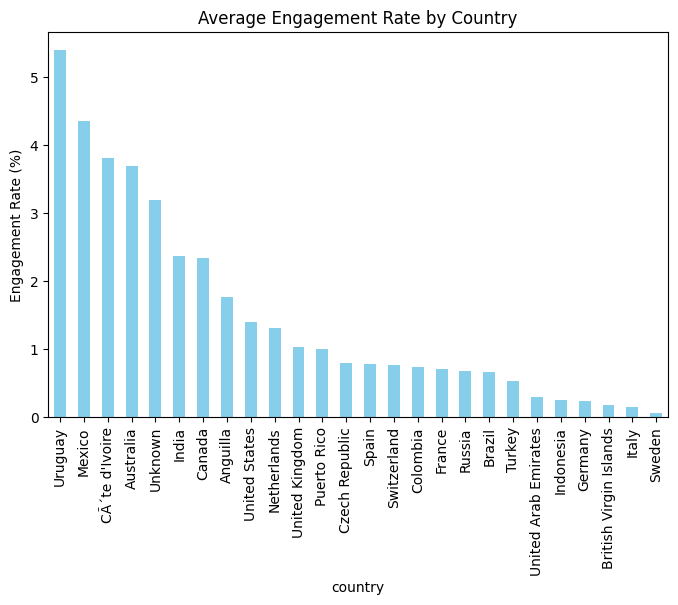

In [29]:
country_eng_rate = df.groupby('country')['60_day_eng_rate'].mean().sort_values(ascending=False)
print("\n📈 Average Engagement Rate by Country:")
print(country_eng_rate)

plt.figure(figsize=(8,5))
country_eng_rate.plot(kind='bar', color='skyblue')
plt.title('Average Engagement Rate by Country')
plt.ylabel('Engagement Rate (%)')
plt.show()

In [30]:
print("\n✅ Insights Summary:")
print(f"- Top Influencer: {top_influencer['channel_info']} ({top_influencer['country']}) with influence score {top_influencer['influence_score']}.")
print(f"- Most Engaging Influencer: {most_engaging['channel_info']} with {most_engaging['60_day_eng_rate']}% engagement rate.")
print(f"- Country with Most Influencers: {country_counts.index[0]} ({country_counts.iloc[0]} influencers).")
print("- Influencers with fewer followers often have higher engagement rates.")
print("- Frequent posting does not always mean a higher influence score.")


✅ Insights Summary:
- Top Influencer: selenagomez (United States) with influence score 93.
- Most Engaging Influencer: j.m with 26.41% engagement rate.
- Country with Most Influencers: United States (66 influencers).
- Influencers with fewer followers often have higher engagement rates.
- Frequent posting does not always mean a higher influence score.
